In [41]:
import cv2
import os
import random
from PIL import Image
import numpy as np

In [118]:
def rotate_and_resize(image, angle):
    # Hämta bildens dimensioner
    height, width = image.shape[:2]

    fill_color=(random.randint(1,255), random.randint(1,255), random.randint(1,255))

    # Skapa rotationsmatris och applicera rotation
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height), borderMode=cv2.BORDER_CONSTANT, borderValue=fill_color)

    # Hitta gränserna för den roterade bilden
    cos_theta = abs(rotation_matrix[0, 0])
    sin_theta = abs(rotation_matrix[0, 1])

    new_width = int((width * cos_theta) + (height * sin_theta))
    new_height = int((width * sin_theta) + (height * cos_theta))

    # Justera rotationsmatrisen för att centrera området med roterat innehåll
    translation_x = (new_width - width) / 2
    translation_y = (new_height - height) / 2
    rotation_matrix[0, 2] += translation_x
    rotation_matrix[1, 2] += translation_y

    rotated_resized_image = cv2.warpAffine(image, rotation_matrix, (new_width, new_height), borderMode=cv2.BORDER_CONSTANT, borderValue=fill_color)

    return rotated_resized_image

In [130]:
def flip_image(image):
    # Horisontellt invertera bilden
    flipped_image = cv2.flip(image, 1)
    return flipped_image

In [4]:
def random_image(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

    if not image_files:
        print("Inga bilder hittades i mappen.")
        return None

    random_image = random.choice(image_files)

    img_path = os.path.join(folder_path, random_image)

    return img_path

In [119]:
folder_path = './dataset/cropped_images/'
test_image_path = random_image(folder_path)
# test_image_path = 'dataset\SB-FishDisease\Healthy Fish\Healthy_Fish_69.jpeg'
original_image = cv2.imread(test_image_path)
image = Image.fromarray(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

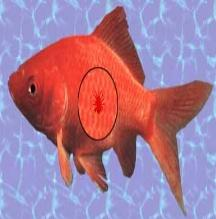

In [120]:
display(image)

In [131]:
flipped_image = flip_image(original_image)

In [135]:
image = rotate_and_resize(original_image, -60)

In [132]:
flipped_image = Image.fromarray(cv2.cvtColor(flipped_image, cv2.COLOR_BGR2RGB))

In [136]:
image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

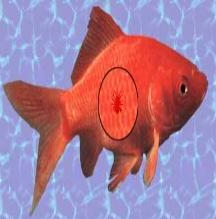

In [133]:
display(flipped_image)

In [ ]:
flipped_image = Image.fromarray(cv2.cvtColor(flipped_image, cv2.COLOR_BGR2RGB))

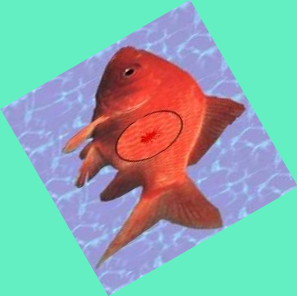

In [137]:
display(image)